<a href="https://colab.research.google.com/github/benai9916/face-mask-detection-CNN-Resnet152V2/blob/master/face_mask_detection_resnet152V2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.1.0
!pip install keras==2.3.1
!pip install gdown

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1752: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
# import the libraries as shown below

import tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import tensorflow
import keras
print(tensorflow.__version__)
print(keras.__version__)


2.1.0
2.3.1


In [ ]:
!gdown --id 1qkuQV1wApJ9wSTc07hDkzzqBUWlPSx8C --output dataset.zip
!unzip dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1qkuQV1wApJ9wSTc07hDkzzqBUWlPSx8C
To: /content/dataset.zip
159MB [00:01, 130MB/s]
Archive:  dataset.zip
replace dataset/test/without_mask/1_0_aidai_0031.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset/test/without_mask/1_0_aidai_0031.jpg  
replace dataset/test/without_mask/augmented_image_304.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset/test/without_mask/augmented_image_304.jpg  
replace dataset/test/without_mask/331.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset/test/without_mask/331.jpg  
replace dataset/test/without_mask/0_0_chenyao_0027.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset/test/without_mask/0_0_chenyao_0027.jpg  
replace dataset/test/without_mask/1_0_anhu_0052.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset/test/without_mask/1_0_anhu_0052.jpg  
replace dataset/test/with_mask/1_0_1 copy 16.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ena

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = "/content/dataset/train"
valid_path  = "/content/dataset/valid"

In [ ]:

# Import the ResNet152V2 library as shown below and add preprocessing layer to the front of ResNet152V2
# Here we will be using imagenet weights

resnet152V2 = tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/dataset/train/*')

In [ ]:
# our layers - you can add more if you want

x = Flatten()(resnet152V2.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3649 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 806 images belonging to 2 classes.


In [ ]:
# drive to save model

os.makedirs('model', exist_ok=True)

In [ ]:
# save best model using vall accuracy
model_path = '/content/model/resnet152v2.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:

# fit the model

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks_list
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 115 steps, validate for 26 steps
Epoch 1/10
  2/115 [..............................] - ETA: 8:17 - loss: 9.6087 - accuracy: 0.4062 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


114/115 [============================>.] - ETA: 0s - loss: 0.7464 - accuracy: 0.9472
Epoch 00001: val_accuracy improved from -inf to 0.98759, saving model to /content/model/resnet152v2.h5
115/115 [==============================] - 99s 859ms/step - loss: 0.7399 - accuracy: 0.9477 - val_loss: 0.2123 - val_accuracy: 0.9876
Epoch 2/10
114/115 [============================>.] - ETA: 0s - loss: 0.1883 - accuracy: 0.9820
Epoch 00002: val_accuracy improved from 0.98759 to 0.99007, saving model to /content/model/resnet152v2.h5
115/115 [==============================] - 89s 773ms/step - loss: 0.1866 - accuracy: 0.9822 - val_loss: 0.1740 - val_accuracy: 0.9901
Epoch 3/10
114/115 [============================>.] - ETA: 0s - loss: 0.2305 - accuracy: 0.9840
Epoch 00003: val_accuracy did not improve from 0.99007
115/115 [==============================] - 87s 757ms/step - loss: 0.2312 - accuracy: 0.9836 - val_loss: 0.2727 - val_accuracy: 0.9901
Epoch 4/10
114/115 [============================>.] - ETA

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/model/last_resnet152v2.h5')

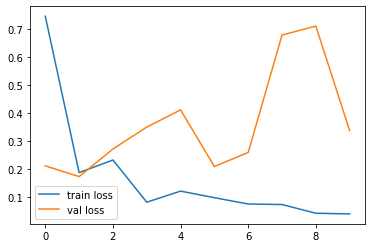

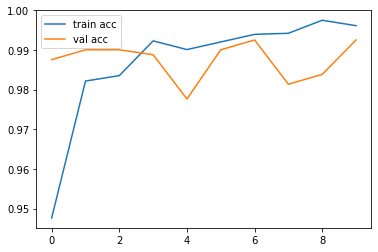

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
!wget https://raw.githubusercontent.com/manishsingh7163/OpenCv-Haarcascade-XML-files/master/haarcascade_frontalface_default.xml

--2020-10-06 15:08:41--  https://raw.githubusercontent.com/manishsingh7163/OpenCv-Haarcascade-XML-files/master/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2020-10-06 15:08:42 (15.3 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [ ]:
from google.colab import files
files.download('haarcascade_frontalface_default.xml')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>